In [0]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# List the files
print("the Total number of the files is ", len(dbutils.fs.ls("/FileStore/tables/Retail")))
dbutils.fs.ls("/FileStore/tables/Retail")

the Total number of the files is  305
Out[33]: [FileInfo(path='dbfs:/FileStore/tables/Retail/2010_12_01.csv', name='2010_12_01.csv', size=275001, modificationTime=1667926398000),
 FileInfo(path='dbfs:/FileStore/tables/Retail/2010_12_02.csv', name='2010_12_02.csv', size=191826, modificationTime=1667926398000),
 FileInfo(path='dbfs:/FileStore/tables/Retail/2010_12_03.csv', name='2010_12_03.csv', size=190700, modificationTime=1667926400000),
 FileInfo(path='dbfs:/FileStore/tables/Retail/2010_12_05.csv', name='2010_12_05.csv', size=246056, modificationTime=1667926400000),
 FileInfo(path='dbfs:/FileStore/tables/Retail/2010_12_06.csv', name='2010_12_06.csv', size=339039, modificationTime=1667926404000),
 FileInfo(path='dbfs:/FileStore/tables/Retail/2010_12_07.csv', name='2010_12_07.csv', size=255832, modificationTime=1667926404000),
 FileInfo(path='dbfs:/FileStore/tables/Retail/2010_12_08.csv', name='2010_12_08.csv', size=235974, modificationTime=1667926407000),
 FileInfo(path='dbfs:/FileSto

In [0]:
# see sample from the data
temp = "/FileStore/tables/Retail/" + dbutils.fs.ls("/FileStore/tables/Retail")[0][1]
spark.read.option("header",True).csv(temp).toPandas()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
3103,536597,35271S,GOLD PRINT PAPER BAG,14,2010-12-01 17:35:00,0.19,18011.0,United Kingdom
3104,536597,21380,WOODEN HAPPY BIRTHDAY GARLAND,1,2010-12-01 17:35:00,2.95,18011.0,United Kingdom
3105,536597,22909,SET OF 20 VINTAGE CHRISTMAS NAPKINS,1,2010-12-01 17:35:00,0.85,18011.0,United Kingdom
3106,536597,21221,SET/4 BADGES CUTE CREATURES,5,2010-12-01 17:35:00,1.25,18011.0,United Kingdom


In [0]:
# b) Output the total number of transactions across all the files and the total value of the transactions.
# Read all csv files and print the transactions
files = []
total_transactions = 0
for i in range(len(dbutils.fs.ls("/FileStore/tables/Retail"))):
    temp = r"/FileStore/tables/Retail/" + dbutils.fs.ls("/FileStore/tables/Retail")[i][1]
    files.append(spark.read.option("header",True).csv(temp).toPandas())
    print("number of transactions for this file", dbutils.fs.ls("/FileStore/tables/Retail")[i][1] ,"=", len(files[i]["InvoiceNo"]))
    total_transactions = total_transactions + len(files[i]["InvoiceNo"])

print("the total number of the transactions is :", total_transactions)

number of transactions for this file 2010_12_01.csv = 3108
number of transactions for this file 2010_12_02.csv = 2109
number of transactions for this file 2010_12_03.csv = 2202
number of transactions for this file 2010_12_05.csv = 2725
number of transactions for this file 2010_12_06.csv = 3878
number of transactions for this file 2010_12_07.csv = 2963
number of transactions for this file 2010_12_08.csv = 2647
number of transactions for this file 2010_12_09.csv = 2891
number of transactions for this file 2010_12_10.csv = 2758
number of transactions for this file 2010_12_12.csv = 1451
number of transactions for this file 2010_12_13.csv = 2283
number of transactions for this file 2010_12_14.csv = 2087
number of transactions for this file 2010_12_15.csv = 1349
number of transactions for this file 2010_12_16.csv = 1790
number of transactions for this file 2010_12_17.csv = 3115
number of transactions for this file 2010_12_19.csv = 522
number of transactions for this file 2010_12_20.csv = 176

In [0]:
# Create total DataFrame
totalDF = pd.DataFrame()

for i in range(len(files)):
    totalDF = pd.concat((totalDF, files[i]),axis = 0)

totalDF["UnitPrice"] = totalDF["UnitPrice"].astype(float)
totalDF["Quantity"] = totalDF["Quantity"].astype(float)

totalDF['total_purchases'] = totalDF['Quantity'] * totalDF['UnitPrice']

totalvalue = totalDF['total_purchases'].sum()
print("the total value of the transactions is :", totalvalue)

the total value of the transactions is : 9747747.933999998


In [0]:
# Output the 5 top-selling products
print("the 5 top-selling products")
totalDF["Quantity"] = totalDF["Quantity"].astype(float)
top_selling_products = totalDF.copy().groupby(["StockCode"]).sum().sort_values(by=['Quantity'], ascending=False)["Quantity"].reset_index().iloc[0:5]
top_selling_products.head(5)

the 5 top-selling products


,StockCode,Quantity
0,22197,56450.0
1,84077,53847.0
2,85099B,47363.0
3,85123A,38830.0
4,84879,36221.0


In [0]:
# Output the 5 topmost valuable products (5 top most higher unit prices)
print("the 5 topmost valuable products (5 top most higher unit prices)")
totalDF["UnitPrice"] = totalDF["UnitPrice"].astype(float)
topmost_valuable_products_unit_price = totalDF.sort_values('UnitPrice', ascending=False).drop_duplicates(['StockCode'])
topmost_valuable_products_unit_price.head(5)

the 5 topmost valuable products (5 top most higher unit prices)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_purchases
857,C556445,M,Manual,-1.0,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,-38970.00
399,C580605,AMAZONFEE,AMAZON FEE,-1.0,2011-12-05 11:36:00,17836.46,None,United Kingdom,-17836.46
628,A563185,B,Adjust bad debt,1.0,2011-08-12 14:50:00,11062.06,None,United Kingdom,11062.06
826,C551685,POST,POSTAGE,-1.0,2011-05-03 12:51:00,8142.75,16029.0,United Kingdom,-8142.75
353,562955,DOT,DOTCOM POSTAGE,1.0,2011-08-11 10:14:00,4505.17,None,United Kingdom,4505.17


In [0]:
# Output the 5 topmost valuable products (5 top most higher values (group by stock id) (Quantity * unit price))
print("the 5 topmost valuable products (5 top most higher values (group by stock id) (Quantity * unit price)")
topmost_valuable_products_value = totalDF.copy().groupby(["StockCode"]).sum().sort_values(by=['total_purchases'], ascending=False)
topmost_valuable_products_value = topmost_valuable_products_value.iloc[:, [2]].reset_index()
topmost_valuable_products_value.head(5)

the 5 topmost valuable products (5 top most higher values (group by stock id) (Quantity * unit price)


,StockCode,total_purchases
0,DOT,206245.48
1,22423,164762.19
2,47566,98302.98
3,85123A,97894.50
4,85099B,92356.03


In [0]:
# Output each country and the total value of their purchases.
print("total value of purchases for each country")
pd.options.display.float_format = '{:.2f}'.format
country_purchases = totalDF.groupby(["Country"]).sum().sort_values(by=['total_purchases'], ascending=False)["total_purchases"].reset_index()
totalDF['total_purchases'] = totalDF['total_purchases'].astype(float)
country_purchases.head(len(totalDF["Country"].unique().tolist()))

total value of purchases for each country


,Country,total_purchases
0,United Kingdom,8187806.36
1,Netherlands,284661.54
2,EIRE,263276.82
3,Germany,221698.21
4,France,197403.90
5,Australia,137077.27
6,Switzerland,56385.35
7,Spain,54774.58
8,Belgium,40910.96
9,Sweden,36595.91


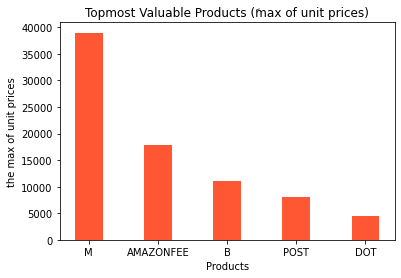

In [0]:
plt.bar(topmost_valuable_products_unit_price["StockCode"].iloc[0:5].tolist(), topmost_valuable_products_unit_price["UnitPrice"].iloc[0:5].tolist(), color ='#FF5733', width = 0.4)
plt.xlabel("Products")
plt.ylabel("the max of unit prices")
plt.title("Topmost Valuable Products (َmax of unit prices)")
plt.show()

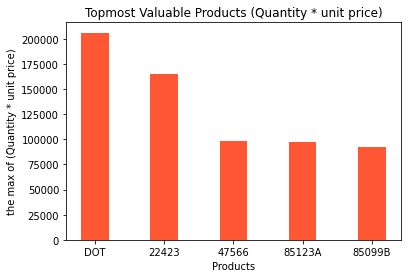

In [0]:
plt.bar(topmost_valuable_products_value["StockCode"].iloc[0:5].tolist(), topmost_valuable_products_value["total_purchases"].iloc[0:5].tolist(), color ='#FF5733', width = 0.4)
plt.xlabel("Products")
plt.ylabel("the max of (َQuantity * unit price)")
plt.title("Topmost Valuable Products (َQuantity * unit price)")
plt.show()